In [88]:
%load_ext autoreload
%autoreload 2
%precision %e

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'%e'

# Boiler plate
- import all packages
- emulate snakemake so can load config as usual
- load the network you want
TODO: make it easier to restore old runs
TODO: hide all the boiler pates in a file

In [89]:
import logging
import pypsa
import os.path
import numpy as np  
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [90]:
# running the jupyter notebook on the compute nodes doesnt build the path as expected, you have to manually do this
import IPython

working_directory = os.path.dirname(IPython.extract_module_locals()[1]['__vsc_ipynb_file__'])
workflow_dir = os.path.dirname(working_directory)
scripts_dir = os.path.join(workflow_dir, "scripts")
root_dir = os.path.dirname(workflow_dir)

os.chdir(scripts_dir)


In [91]:

# from make_summary import assign_carriers
from _helpers import configure_logging, mock_snakemake
from constants import PLOT_COST_UNITS, PLOT_CAP_UNITS,PLOT_SUPPLY_UNITS

logger = logging.getLogger(__name__)


In [ ]:
PLANNING_YEAR = 2055
snakemake = mock_snakemake(
    "plot_network",
    snakefile_path=os.path.abspath("../"),
    topology="current+FCG",
    co2_pathway="exp175default",
    planning_horizons=PLANNING_YEAR,
    heating_demand="positive",
)

configure_logging(snakemake, logger=logger)
config = snakemake.config
tech_colors = config["plotting"]["tech_colors"]


ntw_path = snakemake.input.network

# ntw_path = f"/home/ivanra/downloads/PaperResultsXiaowei_networks/postnetwork-ll-current+Neighbor-exponential175-{PLANNING_YEAR}.nc"
ntw_path = "/p/tmp/yanleizh/PyPSA-China-PIK/results/v-0.2.0_test_co2_pr_baseline_0409SD/overnight_co2pw-exp175default_topo-current+FCG_proj-positive/postnetworks/ntwk_2045.nc"
n = pypsa.Network(ntw_path)
results_dir = os.path.dirname(os.path.dirname(ntw_path))
results_dir 


2025-04-10 11:52:33,956 - _helpers.py - INFO - =========== NEW RUN ===========
2025-04-10 11:52:33,956 - _helpers.py - INFO - =========== NEW RUN ===========
2025-04-10 11:52:33,956 - _helpers.py - INFO - =========== NEW RUN ===========
2025-04-10 11:52:33,956 - _helpers.py - INFO - =========== NEW RUN ===========
2025-04-10 11:52:33,956 - _helpers.py - INFO - =========== NEW RUN ===========
INFO:__main__:=========== NEW RUN ===========
Index(['Anhui H2 Electrolysis', 'Beijing H2 Electrolysis',
       'Chongqing H2 Electrolysis', 'Fujian H2 Electrolysis',
       'Gansu H2 Electrolysis', 'Guangdong H2 Electrolysis',
       'Guangxi H2 Electrolysis', 'Guizhou H2 Electrolysis',
       'Hainan H2 Electrolysis', 'Hebei H2 Electrolysis',
       'Heilongjiang H2 Electrolysis', 'Henan H2 Electrolysis',
       'Hubei H2 Electrolysis', 'Hunan H2 Electrolysis',
       'InnerMongolia H2 Electrolysis', 'Jiangsu H2 Electrolysis',
       'Jiangxi H2 Electrolysis', 'Jilin H2 Electrolysis',
       'Lia

'/p/tmp/yanleizh/PyPSA-China-PIK/results/v-0.2.0_yanlei_lowonwind_nocoupling_0328/overnight_pthw-exp175_topo-current+FCG_proj-positive'

### Fix network for plotting // add missing info

In [93]:
from _plot_utilities import fix_network_names_colors, determine_plottable
from plot_network import plot_cost_map, plot_map
fix_network_names_colors(n, config)
determine_plottable(n)

/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/_plot_utilities.py:205: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.carriers.color.fillna(NAN_COLOR, inplace=True)


# Plot maps

### plot capex

/home/yanleizh/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/yanleizh/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/plot_network.py:185: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/plot_network.py:341: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


DEBUG df in add_cost_pannel:
                        total      added
carrier                                
AC                 76.876319  35.952373
H2                  0.000187   0.000000
H2 Electrolysis     0.000353   0.000000
H2 fuel cell        0.000382   0.000000
H2 pipeline         0.000662   0.000000
PHS                 5.670852   0.000000
Sabatier            0.000109   0.000000
battery            61.074100   0.000000
coal               12.989323   0.000000
gas                21.429507   0.000000
hydroelectricity   21.867144   0.000000
nuclear             0.000209   0.000000
offwind            23.784164   0.000000
onwind            109.569428   0.000000
solar             152.900184   0.000000
DEBUG reordered:
 Index(['nuclear', 'hydroelectricity', 'coal', 'H2', 'H2 fuel cell', 'battery',
       'gas', 'AC', 'H2 Electrolysis', 'H2 pipeline', 'PHS', 'Sabatier',
       'offwind', 'onwind', 'solar'],
      dtype='object')


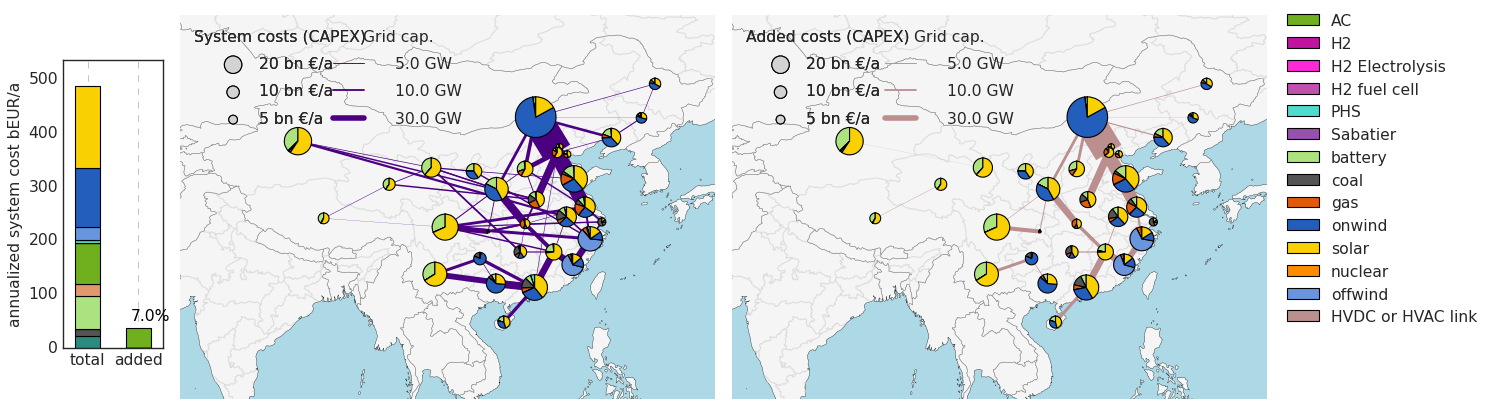

In [94]:
ax = plot_cost_map(n, config["plotting"], cost_pannel=True, capex_only=True)

/home/yanleizh/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/plot_network.py:185: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/plot_network.py:341: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


DEBUG df in add_cost_pannel:
                        capex       opex
carrier                                
AC                 76.876319   0.000000
H2                  0.000187   0.000000
H2 Electrolysis     0.000353   0.000000
H2 fuel cell        0.000382   0.000000
H2 pipeline         0.000662   0.000000
PHS                 5.670852   0.000000
Sabatier            0.000109   0.000072
battery            61.074100   0.000000
coal               12.989323  20.442135
gas                21.429507  53.900392
hydroelectricity   21.867144   0.000000
nuclear             0.000209   0.000046
offwind            23.784164   0.012907
onwind            109.569428   5.216061
solar             152.900184   0.063310
DEBUG reordered:
 Index(['nuclear', 'hydroelectricity', 'coal', 'H2', 'H2 fuel cell', 'battery',
       'gas', 'AC', 'H2 Electrolysis', 'H2 pipeline', 'PHS', 'Sabatier',
       'offwind', 'onwind', 'solar'],
      dtype='object')


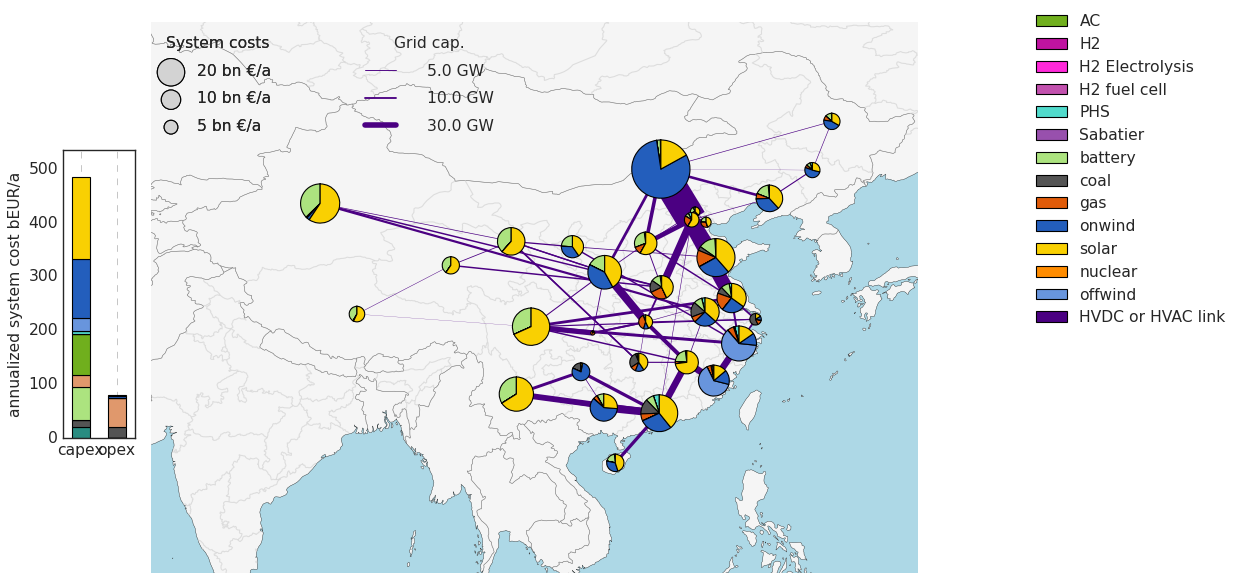

In [95]:
# TODO fix layout
ax = plot_cost_map(n, config["plotting"], cost_pannel=True, plot_additions=False, capex_only=False)

## plot electricy generation map

/home/yanleizh/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/plot_network.py:496: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/plot_network.py:457: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


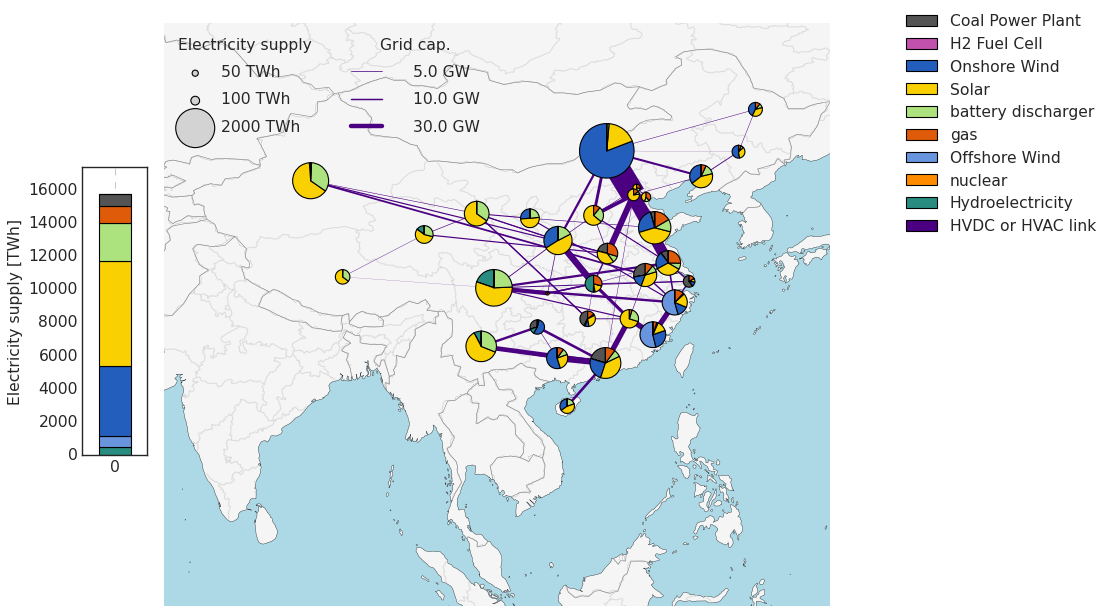

In [96]:
from plot_network import plot_energy_map
from _plot_utilities import set_plot_style
set_plot_style(
    style_config_file= os.path.abspath("../../config/plotting_styles/network_map.mplstyle"),
    base_styles=["classic", "seaborn-v0_8-white"],
)
plot_energy_map(n,config["plotting"], carrier="AC", components = ["Generator", "Link"])

In [97]:
from plot_network import plot_energy_map
from _plot_utilities import set_plot_style

if snakemake.config["heat_coupling"]:
    set_plot_style(
        style_config_file= os.path.abspath("../../config/plotting_styles/network_map.mplstyle"),
        #snakemake.config["plotting"]["network_style_config_file"],
        base_styles=["classic", "seaborn-v0_8-white"],
    )
    plot_energy_map(n,config["plotting"], carrier="heat", components = ["Generator", "Link"])

## Nodal prices

/home/yanleizh/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


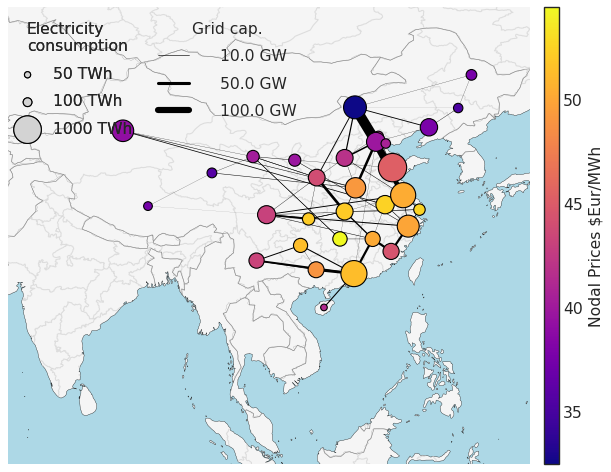

In [98]:
from plot_network import plot_nodal_prices
plot_nodal_prices(n, config["plotting"], "AC")

## Interactive plot map

In [99]:
import numpy as np
# make names and link sizes, make sure we only plot AC, DC & statiosn
ac_links = n.links[n.links.carrier == "AC"]
colors = n.links.index.to_series().apply(lambda x: 'black' if 'ext' in x else 'pink')
widths = np.log(n.links.p_nom_opt + 3) / 2
widths[~widths.index.isin(ac_links.index)] = 0
widths[widths.index.str.contains('reversed')] = 0
names = n.links.copy()
names["name"] = names.index.values
names.loc[~names.index.isin(ac_links.index), "p_nom_opt"] = ""
names.loc[~names.index.isin(ac_links.index), "name"] = ""
buses = n.buses.copy()
buses["name"] = buses.apply(lambda x: f"{x.name}" if x.carrier == "AC" or x.carrier=="stations" else "", axis=1)
buses["sizes"] = buses.apply(lambda x:10 if x.carrier == "AC" or x.carrier=="stations" else 0, axis=1)
buses["colors"] = buses.apply(lambda x: "black" if x.carrier == "AC" else "red", axis=1)
buses.carrier.unique()
ax = n.iplot(link_colors=colors, link_widths=widths, link_text = names.p_nom_opt.astype(str) + names.name, bus_text=buses.name, bus_sizes=buses.sizes, bus_colors=buses.colors)

/p/tmp/yanleizh/anaconda/ipykernel_1124111/316105652.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  names.loc[~names.index.isin(ac_links.index), "p_nom_opt"] = ""


### extendable lines

/home/yanleizh/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


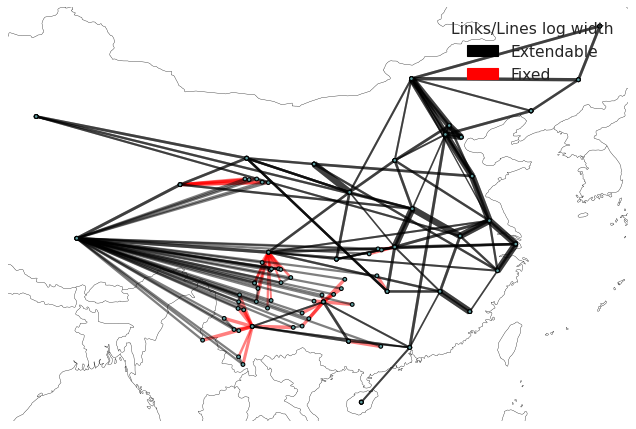

In [100]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10),subplot_kw={"projection":ccrs.PlateCarree()})
def width(x):
    return np.log10(x/1e6).where(x>1,0)
n.plot(ax = ax,link_colors=n.links.p_nom_extendable.apply(lambda x: "red" if not x else "black"),line_colors=n.lines.s_nom_extendable.apply(lambda x: "red" if not x else "black"), link_widths= width(n.links.p_nom_opt) , line_widths=width(n.lines.s_nom_opt), link_alpha=0.5)
# Create custom legend
import matplotlib.patches as mpatches
extendable_patch = mpatches.Patch(color='black', label='Extendable')
non_extendable_patch = mpatches.Patch(color='red', label='Fixed')
ax.legend(handles=[extendable_patch, non_extendable_patch], title = "Links/Lines log width")

# Shadow prices & prices

In [101]:
from make_summary import make_summaries
summaries = make_summaries({("exp175-paper", PLANNING_YEAR):ntw_path})

INFO:make_summary:Make summary for scenario ('exp175-paper', 2055), using /p/tmp/yanleizh/PyPSA-China-PIK/results/v-0.2.0_yanlei_lowonwind_nocoupling_0328/overnight_pthw-exp175_topo-current+FCG_proj-positive/postnetworks/ntwk_2045.nc
Index(['Anhui H2 Electrolysis', 'Beijing H2 Electrolysis',
       'Chongqing H2 Electrolysis', 'Fujian H2 Electrolysis',
       'Gansu H2 Electrolysis', 'Guangdong H2 Electrolysis',
       'Guangxi H2 Electrolysis', 'Guizhou H2 Electrolysis',
       'Hainan H2 Electrolysis', 'Hebei H2 Electrolysis',
       'Heilongjiang H2 Electrolysis', 'Henan H2 Electrolysis',
       'Hubei H2 Electrolysis', 'Hunan H2 Electrolysis',
       'InnerMongolia H2 Electrolysis', 'Jiangsu H2 Electrolysis',
       'Jiangxi H2 Electrolysis', 'Jilin H2 Electrolysis',
       'Liaoning H2 Electrolysis', 'Ningxia H2 Electrolysis',
       'Qinghai H2 Electrolysis', 'Shaanxi H2 Electrolysis',
       'Shandong H2 Electrolysis', 'Shanghai H2 Electrolysis',
       'Shanxi H2 Electrolysis',

# CO2 emissions & Stores


In [102]:
n.global_constraints

,type,investment_period,carrier_attribute,sense,constant,mu
GlobalConstraint,,,,,,
co2_limit,primary_energy,NaN,co2_emissions,<=,1.237172e+09,-17.480362


<Axes: xlabel='snapshot'>

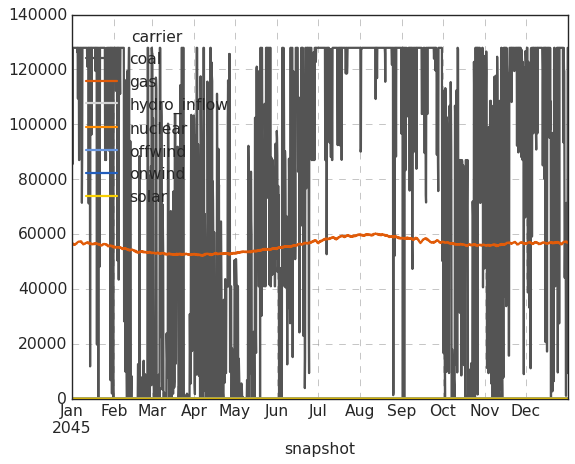

In [103]:
fig, ax = plt.subplots()
# calc the t resolved CO2 emissions from generators
time_res_emissions = ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum()
colors = time_res_emissions.T.columns.map(tech_colors).fillna("lightgrey")
time_res_emissions.T.plot(ax =ax, color =  colors, legend = True)

Text(0, 0.5, 'cum CO2 emissions [t]')

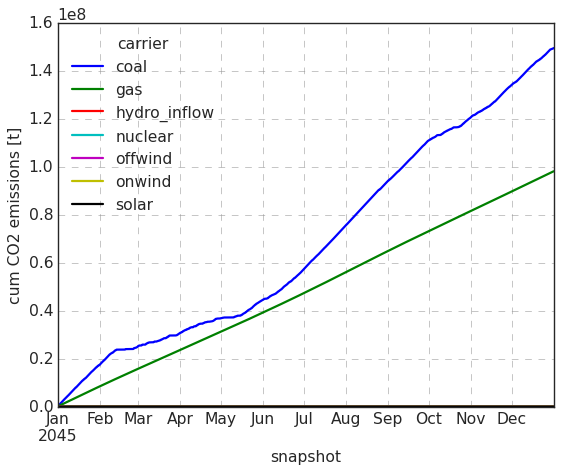

In [104]:
gen_emissions = ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum().T.cumsum()
fig, ax = plt.subplots()
gen_emissions.where(gen_emissions>=0).dropna(axis=1, how="all").plot(ax=ax)
ax.set_ylabel("cum CO2 emissions [t]")


Overnight model does not have CO2 capture or biomass stores, skipped


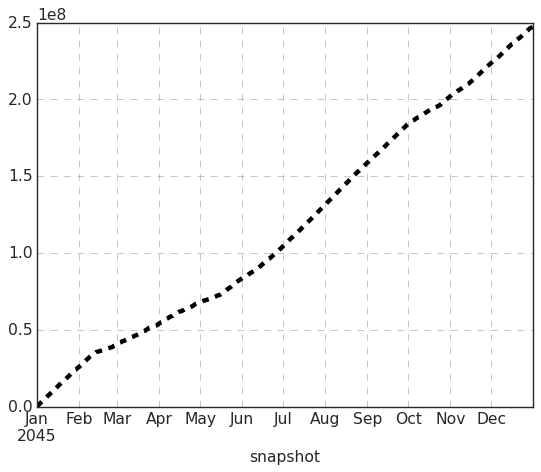

In [105]:
try:
    fig, ax = plt.subplots()
    # calc the t resolved CO2 emissions from generators
    ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum().sum().T.cumsum().plot(ax =ax, label = "CO2 emissions (cum)", lw=4, c ="black", ls = "--")
    n.stores_t.e.T.groupby(n.stores.carrier).sum().loc[["CO2","H2", "CO2 capture", "gas", "biomass"]].T.plot(lw=4, cmap ="jet", ax =ax)
    ax.legend()
    ax.semilogy()
    ax.set_ylim(1e3,1e10)
    ax.set_ylabel("carrier stock")
except KeyError:
    print("Overnight model does not have CO2 capture or biomass stores, skipped")

<Axes: xlabel='snapshot'>

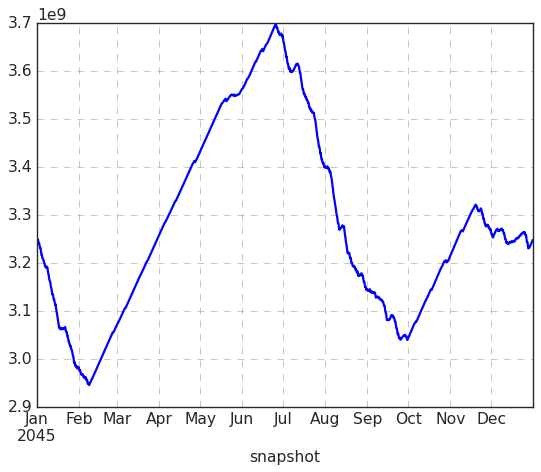

In [106]:

gas_stores = n.stores[n.stores.carrier.str.contains("gas")]
gas_stores_t = n.stores_t.e[n.stores_t.e.columns.intersection(gas_stores.index)]
gas_stores_t.sum(axis=1).plot()

## CO2 capture
! beware the store is the difference :)

In [107]:
try:
    stores = n.stores_t.e.T.groupby(n.stores.carrier).sum()
    diff = stores.iloc[:, -1] -stores.iloc[:, 0]
    co2_cap = stores.iloc[:, -1].loc[["CO2 capture"]].sum()
    co2_cap
except KeyError:
    print("Overnight model does not have CO2 capture or biomass stores, skipped")


Overnight model does not have CO2 capture or biomass stores, skipped


<Axes: xlabel='snapshot'>

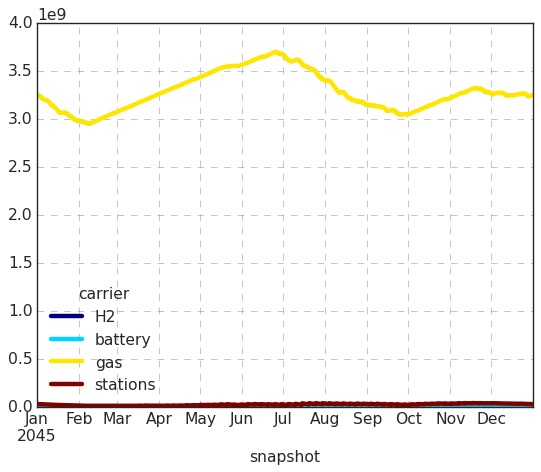

In [108]:
n.stores_t.e.T.groupby(n.stores.carrier).sum().T.plot(lw=4, cmap ="jet")

# Time series

## Weekly energy balances

In [109]:
from plot_time_series import plot_energy_balance

TypeError: no numeric data to plot

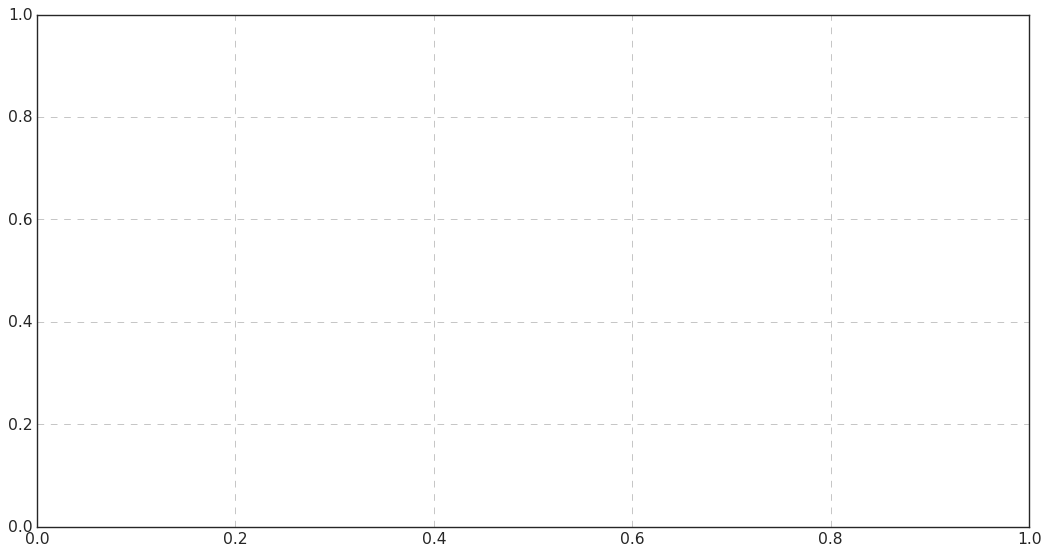

In [110]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-01-01 01:00", end_date=f"{PLANNING_YEAR}-12-31 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

In [ ]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-07-24 00:00", end_date=f"{PLANNING_YEAR}-07-31 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

In [ ]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-03-31 21:00", end_date=f"{PLANNING_YEAR}-04-06 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

## price series

In [ ]:
from constants import PROV_NAMES 
marginal_price_series = n.buses_t["marginal_price"][PROV_NAMES]
prov_max_price_series = marginal_price_series.T.max()
prov_min_price_series = marginal_price_series.T.min()
spread = marginal_price_series.T.max()-marginal_price_series.T.min()
load_ac = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False, groupby="location", comps = "Load")

regional_weighed_price = marginal_price_series.T.mul(load_ac).T.sum()/load_ac.T.sum()
order =regional_weighed_price.sort_values().index

weighed_prices = (marginal_price_series.T.mul(load_ac)/load_ac.sum()).sum()
ax = marginal_price_series[order].plot(alpha=0.5, lw=2, legend=False, cmap="plasma")
weighed_prices.plot(ax = ax, lw=3, c="black", label = "weighted price avg", alpha =0.8, ls = "--")
ax.legend(  loc='upper left', bbox_to_anchor=(1, 1), ncols=2)

In [ ]:
from _plot_utilities import find_weeks_of_interest
from constants import PROV_NAMES

winter_week, summer_week = find_weeks_of_interest(n, f"{PLANNING_YEAR}-04-01", f"{PLANNING_YEAR}-10-06")
marginal_price_series = n.buses_t["marginal_price"][PROV_NAMES]
prov_max_price_series = marginal_price_series.T.max()
prov_min_price_series = marginal_price_series.T.min()
spread = marginal_price_series.T.max()-marginal_price_series.T.min()
load_ac = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False, groupby="location", comps = "Load")
weighed_prices = (marginal_price_series.T.mul(load_ac)/load_ac.sum()).sum()
print("calculated prices")

ax = prov_min_price_series.loc[summer_week].plot(label = "Marginal price\n(least expensive province)")
prov_max_price_series.loc[summer_week].plot(label = "Marginal price\n(most expensive province)", ax =ax)
# spread.loc[summer_week].plot(label = "Price spread", ax =ax, ls= "--")
ax.set_ylabel("Price [€/MWh]")
# ax.vlines(winter_week[len(winter_week)//2], 0,prov_max_price_series.max()*1.2, color="black", ls = "--", label="peak event")
ax.vlines(summer_week[len(summer_week)//2], 0,prov_max_price_series.loc[summer_week].max()*1.2, color="black", ls ="--", label="peak event")

weighed_prices.loc[summer_week].plot(ax=ax, label ="national mean weighted price")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")

In [ ]:

ax = prov_min_price_series.plot(label = "Marginal price\n(least expensive province)", logy=True)
ax = prov_max_price_series.plot(label = "Marginal price\n(most expensive province)", logy=True)
ax.set_ylabel("Price [€/MWh]")
ax.vlines(winter_week[len(winter_week)//2], 0,prov_max_price_series.max()*1.2, color="black", ls = "--", label="peak event")
ax.vlines(summer_week[len(summer_week)//2], 0,prov_max_price_series.max()*1.2, color="black", ls ="--", label="peak event")

weighed_prices.plot(ax=ax, label ="national mean weighted price", logy=True)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Legend")

## Prices - balance overlay

In [ ]:
ax = plot_energy_balance(n, config["plotting"], start_date=str(winter_week[0]), end_date=str(winter_week[-1]))
ax.grid(axis='y')
ax.set_title("Electricity Balance")
ax2 = ax.twinx()
prov_max_price_series.loc[winter_week].plot(ax=ax2, color="red", lw=2, ls = "--", label= "Most exp Prov")
weighed_prices.loc[winter_week].plot(ax=ax2, color = "blue", lw=3, ls = ":",label = "National weighted price")
fig = ax.get_figure()
ax2.set_ylabel("PriceEur/MWh", color="red")
ax2.tick_params(axis='y', labelcolor='red')
# Move the existing legend to the right
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))


In [ ]:
ax = plot_energy_balance(n, config["plotting"], start_date=str(summer_week[0]), end_date=str(summer_week[-1]))
ax.grid(axis='y')
ax.set_title("Electricity Balance")
ax2 = ax.twinx()
prov_max_price_series.loc[summer_week].plot(ax=ax2, color="red", lw=2, ls = "--", label= "Most exp Prov")
weighed_prices.loc[summer_week].plot(ax=ax2, color = "blue", lw=3, ls = ":",label = "National weighted price")
fig = ax.get_figure()
ax2.set_ylabel("PriceEur/MWh", color="red")
ax2.tick_params(axis='y', labelcolor='red')
# Move the existing legend to the right
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles + handles2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))


In [38]:
if snakemake.config["heat_coupling"]:
    ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-03-31 21:00", end_date=f"{PLANNING_YEAR}-09-06 12:00:00", bus_carrier="heat")
    ax.set_title("Heat balance")
    ax2 = ax.twinx()
    prov_max_price_series.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].plot(ax=ax2, color="red", lw=2, ls = "--", label= "Most exp Prov")
    weighed_prices.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].plot(ax=ax2, color = "blue", lw=3, ls = ":",label = "National weighted price")
    prov_min_price_series.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].plot(ax=ax2, color="green", lw=2, ls = "--", label= "Least exp Prov")

    fig = ax.get_figure()
    ax2.set_ylabel("PriceEur/MWh", color="red")
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim([0, prov_max_price_series.loc[f"{PLANNING_YEAR}-03-31 21:00":f"{PLANNING_YEAR}-09-06 12:00:00"].max()*3])
    # Move the existing legend to the right
    handles, labels = ax.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(handles + handles2, labels + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))


In [39]:
if snakemake.config["heat_coupling"]:
    ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-01-01 00:00", end_date=f"{PLANNING_YEAR}-12-31 23:00:00", bus_carrier="heat")
    ax.set_title("Heat balance")

# LOAD DURATION CURVES

In [ ]:
from plot_time_series import plot_residual_load_duration_curve, plot_load_duration_curve

plot_load_duration_curve(n, carrier="AC")
plot_residual_load_duration_curve(n)

In [ ]:
from plot_time_series import plot_regional_load_durations

plot_regional_load_durations(n, carrier="AC", cmap = "viridis")


In [ ]:
fix, ax = plt.subplots()
ds_AC = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False).loc[("Load", "-")]/1e3
ds_AC.plot(ax=ax, label="Electricity",  c="orange")
if snakemake.config["heat_coupling"]:
    ds_heat = n.statistics.withdrawal(bus_carrier="heat", aggregate_time=False).loc[("Load", "-")]/1e3
    ds_heat.plot(ax=ax, label="Heat", c = "blue")  
ax.legend()
ax.set_ylabel("EnergyDemand / GW")

## Power flows map

In [ ]:
from _pypsa_helpers import get_location_and_carrier
transmission = n.statistics.transmission(
        bus_carrier="AC",
        groupby=get_location_and_carrier,
        aggregate_time=False,
    )
ax = (
    (transmission/1e6)
    .groupby("location")
    .sum()
    .T.loc[f"{PLANNING_YEAR}-07-20":f"{PLANNING_YEAR}-07-27"]
    .plot.area(stacked=True, cmap="viridis")
)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Prov", ncols=2)
ax.set_ylabel("Transmission [TWh]")

### Plot cap factors time series

In [46]:
capacity_factors = n.statistics.capacity_factor(aggregate_time=False).loc[["Generator"]].droplevel(0).T

In [ ]:
colors_lowered = {k.lower().rstrip():v for k,v in config["plotting"]["tech_colors"].items()}
cap_colors = {k: colors_lowered.get(k.lower().rstrip(), "lightgrey") for k in [c for c in capacity_factors.columns]}
axes = capacity_factors.dropna(axis=1, how="all").fillna(0).plot(subplots=True, figsize=(10,12), color= cap_colors)
for ax in axes:
    ax.set_ylim([0,1.1])
    ax.set_yticks([0,0.3, 0.6,1])

In [ ]:
region_rev = n.statistics.revenue(groupby = ["location", "carrier"], bus_carrier="AC", aggregate_time=False).fillna(0)
rev_regional = region_rev[(region_rev<0).all(axis=1)].groupby("location").sum().T
prod_reg = n.statistics.energy_balance(groupby = ["location", "carrier"], bus_carrier="AC", aggregate_time=False)
consum_regional = prod_reg[(prod_reg<0).all(axis=1)].groupby("location").sum().T
supp_regional = prod_reg[(prod_reg>0).all(axis=1)].groupby("location").sum().T
ax = (rev_regional/consum_regional).plot(cmap="viridis")
ax.set_ylabel("Expenditure/Withdrawal [€/MWh]")
ax.set_xlabel("Time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncols=2)


In [ ]:
supp_regional = prod_reg[(prod_reg>0).all(axis=1)].groupby("location").sum().T

In [ ]:

fig, axes = plt.subplots(6,6, sharex=True, sharey=True, figsize=(20,20))
norm_price =  n.buses_t["marginal_price"][PROV_NAMES].loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"]
norm_price/= norm_price.max()
norm_price*=(consum_regional*-1e-6).loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].max().max()*0.8
consum_regional = consum_regional[PROV_NAMES]
for i,c in enumerate(consum_regional.columns):
    k, l = (i+4)//6, (i+4)%6
    (consum_regional[c]*-1e-6).loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].plot(ax=axes[k,l])
    (supp_regional[c]*1e-6).loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].plot(ax=axes[k,l], color = "orange", alpha = 0.5)
    norm_price[c].plot(ax=axes[k,l], color = "green", alpha = 0.5, legend = False)
    axes[k,l].set_title(c)
    axes[k,l].set_ylim(0, consum_regional.min().min()*-1e-6)

    if l ==0:
        axes[k,l].set_ylabel("Withdrawal or supply [TWh]")
    if k==0:
        axes[k,l].set_xlabel("Time")
axes[0, 4].legend(["Withdrawal (blue)", "Supply (orange)", "Norm Price (green)"])
fig.tight_layout()
fig.subplots_adjust(hspace=0.05, wspace=0.1)

In [ ]:
from constants import PROV_NAMES 
ax = n.buses_t["marginal_price"][PROV_NAMES].loc[f"{PLANNING_YEAR}-07-22":f"{PLANNING_YEAR}-07-28"].plot(cmap="viridis",alpha =0.7, logy=True)
ax.set_ylabel("Marginal Price [€/MWh]")
ax.set_xlabel("Time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Province", ncol=2)

In [ ]:
rev_and_exp = n.statistics.revenue(bus_carrier="AC", aggregate_time=False).fillna(0).groupby(level=1).sum().T
prod = n.statistics.energy_balance(bus_carrier="AC", aggregate_time=False).fillna(0)
prod = prod[~(prod<=0).all(axis=1)]
prod=prod.clip(lower=1e-5).groupby(level=1).sum().T
hourly_price = rev_and_exp.clip(lower=0)/prod
hourly_price = hourly_price.loc[:,(hourly_price>0).all(axis=0)]
ax = hourly_price.plot(logy=False, cmap = "viridis")
ax.set_ylim([1, hourly_price.max().max()*1.2])
ax.set_ylabel("Revenue/Supply [€/MWh]")
ax.set_xlabel("Time")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = (prod/1e6).plot(cmap="viridis", logy=False)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Carrier", ncol=2)
ax2.set_ylabel("Supply [TWh]")
ax2.set_xlabel("Time")
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
colors_lowered = {k.lower().rstrip():v for k,v in config["plotting"]["tech_colors"].items()}
cap_colors = {k: colors_lowered.get(k.lower().rstrip(), "lightgrey") for k in [c for c in capacity_factors.columns]}

# Apply rolling moving average filter
capacity_factors_smoothed = capacity_factors.rolling(window=24, min_periods=1).mean()

axes = capacity_factors_smoothed.dropna(axis=1, how="all").fillna(0).plot(subplots=True, figsize=(10,12), color= cap_colors)
for ax in axes:
    ax.set_ylim([0,1.1])
    ax.set_yticks([0,0.3, 0.6,1])

# COSTS & prices

In [1]:
from plot_summary_all import plot_prices
paths = [os.path.join(results_dir, "summary", f"ntwk_{yr}") for yr in snakemake.config["scenario"]["planning_horizons"]]
data_paths = {
        "energy": [os.path.join(p, "energy.csv") for p in paths],
        "costs": [os.path.join(p, "costs.csv") for p in paths],
        "co2_price": [os.path.join(p, "metrics.csv") for p in paths],
        "time_averaged_prices": [os.path.join(p, "time_averaged_prices.csv") for p in paths],
        "weighted_prices": [os.path.join(p, "weighted_prices.csv") for p in paths],
        "co2_balance": [os.path.join(p, "co2_balance.csv") for p in paths],
        "energy_supply": [os.path.join(p, "supply_energy.csv") for p in paths],
        "capacity": [os.path.join(p, "capacities.csv") for p in paths],
    }

fig, ax = plt.subplots()
plot_prices(
    data_paths["time_averaged_prices"],
    config["plotting"],
    fig_name=None,
    ax=ax
)

fig, ax = plt.subplots()
plot_prices(
    data_paths["weighted_prices"],
    config["plotting"],
    fig_name=None,
    ax=ax,
)
# ax.semilogy()

ModuleNotFoundError: No module named 'plot_summary_all'

In [56]:
stores_inflow = n.stores_t.p.sum()
h2_stores= stores_inflow.loc[[c for c in stores_inflow.index if c.find("H2 Store")!=-1]]
h2_stores_inflow = h2_stores.where(h2_stores>0,0).sum()
h2_stores_outflow = h2_stores.where(h2_stores<0,0).sum()

# STATS

In [ ]:
n.statistics.optimal_capacity( groupby = pypsa.statistics.get_carrier_and_bus_carrier, nice_names=True)

In [58]:
def get_solver_tolerance(config: dict, tol_name = "BarConvTol")->float:
    """get the solver tolerance from the config 

    Args:
        config (dict): the config
        tol_name (str): the name of the tolerance option. Defaults to "BarConvTol"

    Returns:
        float: the value
    """    
    solver_opts = config["solving"]["solver"]["options"]
    return config["solving"]["solver_options"][solver_opts][tol_name]

def find_numerical_zeros(n, config, tolerance_name = "BarConvTol")->list:
    """
    Identify numerical zeros in the network's optimization results.

    This function checks for numerical zeros in the network's optimization results, 
    such as link capacities or weighted prices, based on a specified solver tolerance.

    Args:
        n (pypsa.Network): The PyPSA network object containing optimization results.
        config (dict): Configuration dictionary containing solver options.
        tolerance_name (str): The name of the solver tolerance option to use. Defaults to "BarConvTol".

    Returns:
        list: A list of items (e.g., links or buses) where numerical zeros are detected.
    """
 
    tol = get_solver_tolerance(config, tolerance_name)
    threshold = n.objective*float(tol)
    
    costs = pd.concat([n.statistics.expanded_capex(), n.statistics.opex()],axis=1)
    return costs.fillna(0).sum(axis=1).loc[costs.sum(axis=1) < threshold].index
    
num_zeros = find_numerical_zeros(n, config, tolerance_name = "BarConvTol")

In [ ]:
bus_carrier = "AC"
n.loads.carrier = "load"
n.carriers.loc["load", ["nice_name", "color"]] = "Load", "#110d63"
colors = n.carriers.set_index("nice_name").color.where(
    lambda s: s != "", "lightgrey"
)

def rename_index(ds):
    specific = ds.index.map(lambda x: f"{x[1]}\n({x[0]})")
    generic = ds.index.get_level_values("carrier")
    duplicated = generic.duplicated(keep=False)
    index = specific.where(duplicated, generic)
    return ds.set_axis(index)

def plot_static_per_carrier(ds, ax, drop_zero=True):
    if drop_zero:
        ds = ds[ds != 0]
    ds = ds.dropna()
    c = colors[ds.index.get_level_values("carrier")]
    ds = ds.pipe(rename_index)
    label = f"{ds.attrs['name']} [{ds.attrs['unit']}]"
    ds.plot.barh(color=c.values, xlabel=label, ax=ax)
    ax.grid(axis="y")

fig, ax = plt.subplots()
ds = n.statistics.capacity_factor(bus_carrier=bus_carrier).dropna()
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.installed_capacity(bus_carrier=bus_carrier).dropna()
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds.drop(("Generator", "Load"), errors="ignore")
ds = ds / 1e3
ds.attrs["unit"] = "GW"
plot_static_per_carrier(ds.abs(), ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.optimal_capacity(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds.drop(("Generator", "Load"), errors="ignore")
ds = ds.abs() / 1e3
ds.attrs["unit"] = "GW"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.capex(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.opex(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.curtailment(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.supply(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / 1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

if snakemake.config["heat_coupling"]:
    fig, ax = plt.subplots()
    ds = n.statistics.supply(bus_carrier="heat")
    if "Line" in ds.index:
        ds = ds.drop("Line")
    ds = ds / 1e6
    ds.attrs["unit"] = "TWh"
    plot_static_per_carrier(ds, ax)
    plt.show()

fig, ax = plt.subplots()
ds = n.statistics.withdrawal(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / -1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.market_value(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

In [60]:
def calc_lcoe(n: pypsa.Network, grouper = pypsa.statistics.get_carrier_and_bus_carrier, **kwargs)->pd.DataFrame:
    """calculate the LCOE for the network: (capex+opex)/supply.

    Args:
        n (pypsa.Network): the network for which LCOE is to be calaculated
        grouper (function | list, optional): function to group the data in network.statistics.
                Overwritten if groupby is passed in kwargs.
                Defaults to pypsa.statistics.get_carrier_and_bus_carrier. 
        **kwargs: other arguments to be passed to network.statistics
    Returns:
        pd.DataFrame: The LCOE for the network  with or without brownfield CAPEX. MV and delta

    """    
    if "groupby" in kwargs:
        grouper = kwargs.pop("groupby")

    rev= n.statistics.revenue(groupby=grouper,**kwargs)
    opex = n.statistics.opex(groupby=grouper,**kwargs)
    capex = n.statistics.expanded_capex(groupby=grouper,**kwargs)
    tot_capex = n.statistics.capex(groupby=grouper,**kwargs)
    supply = n.statistics.supply(groupby=grouper,**kwargs)

    profits = pd.concat([opex, capex, tot_capex, rev, supply], axis=1,  keys = ["OPEX", "CAPEX", "CAPEX_wBROWN", "Revenue", "supply"]).fillna(0)
    profits["rev-costs"]=profits.apply(lambda row: row.Revenue-row.CAPEX-row.OPEX, axis=1)
    profits["LCOE"] = profits.apply(lambda row: (row.CAPEX+row.OPEX)/row.supply, axis=1)
    profits["LCOE_wbrownfield"] = profits.apply(lambda row: (row.CAPEX_wBROWN+row.OPEX)/row.supply, axis=1)
    profits["MV"] = profits.apply(lambda row: row.Revenue/row.supply, axis=1)
    profits["profit_pu"]=profits["rev-costs"]/profits.supply
    profits.sort_values("profit_pu", ascending=False, inplace=True)
    
    return profits[profits.supply>0]




In [ ]:
rev_costs = calc_lcoe(n, groupby=None)
rev_costs = calc_lcoe(n, groupby=None)
ds = rev_costs["LCOE"]
ds.attrs={"name":"LCOE", "unit":"€/MWh"}
fig, ax = plt.subplots()
plot_static_per_carrier(ds[~ds.index.isin(num_zeros)], ax)
plt.show()

rev_costs = calc_lcoe(n, groupby=None)
ds = rev_costs["profit_pu"]
ds.attrs={"name":"MV - LCOE", "unit":"€/MWh"}
fig, ax = plt.subplots()
plot_static_per_carrier(ds[~ds.index.isin(num_zeros)], ax)
plt.show()

# Network topology
irrelevant as don't have lines

In [18]:
n.determine_network_topology()
n.sub_networks["n_branches"] = [
    len(sn.branches()) for sn in n.sub_networks.obj
]
n.sub_networks["n_buses"] = [len(sn.buses()) for sn in n.sub_networks.obj]


# CO2 costs

In [ ]:
if "emission_prices" in n.meta:
    em_price_gas = float(n.statistics.supply(comps="Generator")["gas"]*n.meta["emission_prices"]["co2"]*0.2/0.43)
    print(f"{em_price_gas:.2e}")
n.global_constraints

In [ ]:
costs.rename(columns={"Unnamed: 0":"expend", "Unnamed: 1": "carrier"}, inplace=True)
costs_ = costs.set_index(["expend", "carrier"]).T
costs_.T.groupby("expend").sum().T.sort_index().plot(kind="bar", stacked=True)

In [ ]:
costs_s = costs_.T.sum()
dt = 5
costs_s.index = costs_s.index.astype(int)
co2_costs = co2.set_index("Year")["costs bnE"]
costs_df = pd.DataFrame({'Costs pw bn eur': costs_s, 'CO2 Costs bn eur': co2_costs})
costs_df["Costs no co2 bn eur"] = costs_df["Costs pw bn eur"] - costs_df["CO2 Costs bn eur"]
costs_df["discount"]=costs_df.apply(lambda x: 1.02**(x.name-min(costs_df.index)), axis =1)
discounted_costs = costs_df.apply(lambda x: x/x.discount, axis=1)
discounted_costs, costs_df.apply(lambda x: x.sum()*5 ), discounted_costs.apply(lambda x: x.sum()*5 )

In [ ]:
discounted_costs["Costs pw bn eur"].plot(kind="bar", stacked=True, color="blue", label="Costs pw bn eur")

In [ ]:

ax = costs_.T.unstack(level=0).T.sort_index().plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    width=0.8, 
    legend=True)


# Customize the legend with a dictionary, including bbox_to_anchor
legend_kw = {
    'title': 'Carrier',          # Title of the legend
    'loc': 'upper left',              # Legend location (usually 'upper left' or 'best')
    'fontsize': 'small',              # Font size for the legend
    'frameon': False,                 # Remove the legend's frame
    'ncol': 2,                        # Number of columns in the legend
    'bbox_to_anchor': (1.05, 1),      # Adjust the legend's position (x, y)
    'borderaxespad': 0.5              # Padding between the legend and plot
}

# Apply the legend customization
ax.legend(**legend_kw)

# Validation

In [41]:
keys=[k for k in n.generators_t.keys() if "mu" in k]

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pdf import pdf_pages

# 获取数据
capacity = n.statistics.optimal_capacity(groupby=["carrier", "location"]) / 1e3  # GW
generation = n.statistics.supply(groupby=["carrier", "location"]) / 1e6  # TWh

# 整理成 DataFrame 格式
df_cap = capacity.unstack("carrier").fillna(0)
df_gen = generation.unstack("carrier").fillna(0)
print(df_cap)
import matplotlib.pyplot as plt
import pandas as pd
# 只选择 Generator 的数据
df_cap_generator = df_cap.loc["Generator"]
df_gen_generator = df_gen.loc["Generator"]

# 然后再按 location 聚合
df_cap_grouped = df_cap_generator.groupby("location").sum()
df_gen_grouped = df_gen_generator.groupby("location").sum()


# 按你提供的 tech_colors 来选定 carrier 顺序
tech_colors = config["plotting"]["tech_colors"]
carriers = [c for c in tech_colors if c in df_cap_grouped.columns]
colors = [tech_colors[c] for c in carriers]

df_cap_plot = df_cap_grouped[carriers]
df_gen_plot = df_gen_grouped[carriers]

# --- 开始画图 ---
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# 上图：装机容量
df_cap_plot.plot(kind="bar", stacked=True, ax=axes[0], color=colors)
axes[0].set_ylabel("Capacity (GW)")
axes[0].set_title("Capacity by carrier and location")

# 下图：发电量
df_gen_plot.plot(kind="bar", stacked=True, ax=axes[1], color=colors)
axes[1].set_ylabel("Generation (TWh)")
axes[1].set_title("Generation by carrier and location")
axes[1].set_xticklabels(df_cap_plot.index, rotation=45, ha="right")

# 图例只放上面一个图
axes[0].legend(title="Technology", bbox_to_anchor=(1.01, 1), loc="upper left")
axes[1].legend().remove()

plt.tight_layout()
plt.show()
pdf_pages.savefig(fig)  # 保存到 PDF
plt.close(fig)          # 关闭当前图，避免 notebook 多余显示



ImportError: cannot import name 'pdf_pages' from 'matplotlib.backends.backend_pdf' (/home/yanleizh/.conda/envs/pypsa-china/lib/python3.12/site-packages/matplotlib/backends/backend_pdf.py)

component    carrier           
Store        battery               1.353389e+09
Generator    coal                  2.653107e+10
             gas                   1.750699e+09
             nuclear               2.000000e-05
             onwind                6.833299e+09
             solar                 7.648024e+09
Load         -                    -4.708285e+10
StorageUnit  PHS                   1.263116e+08
Link         battery               4.830431e+08
             battery discharger    8.400000e-04
             gas OCGT              2.357020e+09
dtype: float64


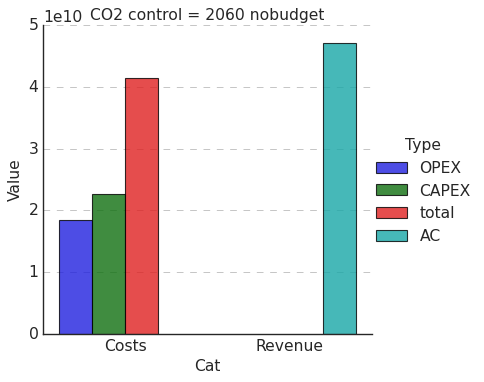

In [80]:
import seaborn as sns
capex_ = n.statistics.expanded_capex().sum()
installed_capex_ = n.statistics.installed_capex().sum()
installed_capex_2 = n.statistics.installed_capex()
# print(installed_capex_2)
opex_ = n.statistics.opex().sum()
costs_ = pd.DataFrame(
    {
        "OPEX": opex_,
        # "Installed CAPEX": installed_capex_,
        "CAPEX": capex_,
        "total": capex_ + 
        installed_capex_
          + opex_,
    }, index = ["Costs"]
).stack()
revenue_ = n.statistics.revenue(comps="Load", bus_carrier="AC").sum()
revenue_2 = n.statistics.revenue()
print(revenue_2)
costs_.loc[("Revenue", "AC")]=revenue_*-1
all_ = pd.concat({"2060 nobudget":costs_}, names=["CO2 control"])
all_.index.names = ["CO2 control", "Cat", "Type"]
all_ = pd.DataFrame(all_, columns = ["Value"])


sns.catplot(all_,x="Cat", y="Value",  hue="Type", col = "CO2 control", dodge=True, kind="bar", alpha =0.8) 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 实际容量 ---
df_opt = n.statistics.optimal_capacity(comps="Generator", groupby=["location", "carrier"]) / 1e3
df_opt = df_opt.unstack().fillna(0)
df_opt[df_opt < 1e-3] = 0

# --- 最大容量 ---
gen = n.generators.copy()
gen = gen[gen.p_nom_extendable]
df_max = gen.groupby(["location", "carrier"])["p_nom_max"].sum().unstack().fillna(0) / 1e3

# 记录哪些位置是 inf
mask_inf = gen.groupby(["location", "carrier"])["p_nom_max"].max().unstack()
mask_inf = mask_inf == np.inf

# 在 df_max 和 df_opt 中都移除这些 inf 技术
for loc in mask_inf.index:
    if loc in df_max.index:
        drop_carriers = mask_inf.columns[mask_inf.loc[loc]]
        df_max.loc[loc, drop_carriers] = np.nan
        df_opt.loc[loc, drop_carriers] = np.nan

df_max = df_max.fillna(0)
df_opt = df_opt.fillna(0)

# --- 对齐 ---
all_locations = sorted(set(df_opt.index) | set(df_max.index))
all_carriers = sorted(set(df_opt.columns) | set(df_max.columns))

df_opt = df_opt.reindex(index=all_locations, columns=all_carriers).fillna(0)
df_max = df_max.reindex(index=all_locations, columns=all_carriers).fillna(0)

# --- 排序 ---
locations = df_opt.sum(axis=1).sort_values().index

# --- 绘图 ---
ncols = 2
nrows = (len(locations) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7 * ncols, 5 * nrows))
axes = axes.flatten()

for i, loc in enumerate(locations):
    ax = axes[i]
    y_max = df_max.loc[loc]
    y_opt = df_opt.loc[loc]

    # 只保留该地区“有限”的技术
    mask = (y_max > 0) | (y_opt > 0)
    y_max = y_max[mask]
    y_opt = y_opt[mask]
    carriers = y_max.index.tolist()

    if len(carriers) == 0:
        ax.set_visible(False)
        continue

    x = range(len(carriers))
    width = 0.35

    ax.bar([xi - width/2 for xi in x], y_max.values, width=width, color="lightgray", label="Potential")
    ax.bar([xi + width/2 for xi in x], y_opt.values, width=width, color="steelblue", label="Optimal")

    ax.set_title(loc)
    ax.set_xticks(x)
    ax.set_xticklabels(carriers, rotation=45, ha="right")
    ax.set_ylabel("Capacity (GW)")
    ax.grid(True, axis="y", alpha=0.3)

    if i == 0:
        ax.legend()

# 删除多余子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/_pypsa_helpers.py:108: RuntimeWarning: divide by zero encountered in scalar divide
  profits["LCOE"] = profits.apply(lambda row: (row.CAPEX + row.OPEX)/row.supply, axis=1)
/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/_pypsa_helpers.py:108: RuntimeWarning: invalid value encountered in scalar divide
  profits["LCOE"] = profits.apply(lambda row: (row.CAPEX + row.OPEX)/row.supply, axis=1)
/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/_pypsa_helpers.py:110: RuntimeWarning: divide by zero encountered in scalar divide
  lambda row: (row.CAPEX_wBROWN + row.OPEX)/row.supply, axis=1)
/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/_pypsa_helpers.py:110: RuntimeWarning: invalid value encountered in scalar divide
  lambda row: (row.CAPEX_wBROWN + row.OPEX)/row.supply, axis=1)
/p/tmp/yanleizh/PyPSA-China-PIK/workflow/scripts/_pypsa_helpers.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  profits["MV"] = profits.apply(lamb

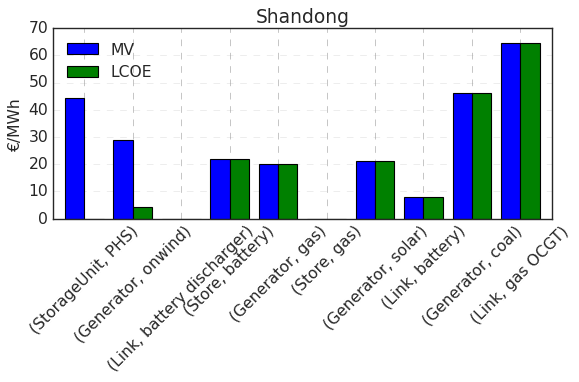

In [82]:
from _pypsa_helpers import calc_lcoe

# 获取 LCOE 和 MV 数据
df = calc_lcoe(n, groupby=["carrier", "location"])
# 获取所有地区并排序（按平均 MV 排序）
mean_mv = df["MV"].groupby("location").mean()
locations = mean_mv.sort_values(ascending=True).index

# 图布局参数
ncols = 2
nrows = (len(locations) + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7 * ncols, 5 * nrows))
axes = axes.flatten()

for i, loc in enumerate(locations):
    ax = axes[i]
    df_loc = df.xs(loc, level="location")
    
    if df_loc.empty:
        ax.set_visible(False)
        continue

    df_loc[["MV", "LCOE"]].plot(kind="bar", ax=ax, width=0.8)
    ax.set_title(loc)
    ax.set_xlabel("")
    ax.set_ylabel("€/MWh")
    ax.grid(True, axis="y", alpha=0.3)
    ax.tick_params(axis="x", labelrotation=45)

# 删除多余子图
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


component    carrier             location
Generator    coal                Shandong    2.653107e+10
             gas                 Shandong    1.750699e+09
             nuclear             Shandong    4.000000e-05
             offwind             Shandong    1.000000e-05
             onwind              Shandong    1.009889e+09
             solar               Shandong    7.648024e+09
Link         battery             Shandong    4.830431e+08
             battery discharger  Shandong    0.000000e+00
             gas OCGT            Shandong    2.357020e+09
Load                             Shandong    0.000000e+00
StorageUnit  PHS                 Shandong    0.000000e+00
Store        battery             Shandong    1.353389e+09
dtype: float64


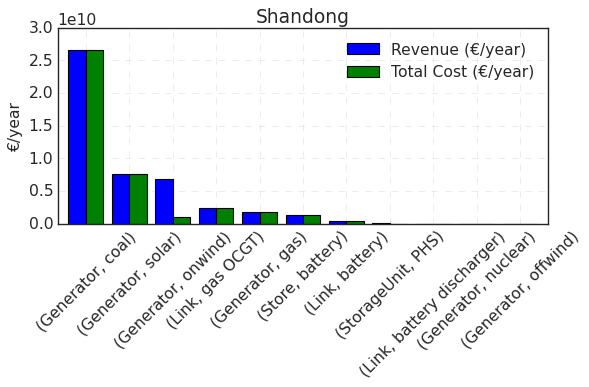

In [81]:
# 指定分组维度
groupby = ["carrier", "location"]

# 获取三项数据
capex = n.statistics.expanded_capex(groupby=groupby)
opex = n.statistics.opex(groupby=groupby)
revenue = n.statistics.revenue(groupby=groupby)

# 获取完整索引：三个 Series 的 index 的并集
full_index = capex.index.union(opex.index).union(revenue.index)

# 对齐所有数据到完整索引，并填补 NaN 为 0
capex = capex.reindex(full_index, fill_value=0)
opex = opex.reindex(full_index, fill_value=0)
revenue = revenue.reindex(full_index, fill_value=0)

# 计算 total cost 和 profit
total_cost = capex + opex
print(total_cost)
profit = revenue - total_cost

# 汇总成 DataFrame
comparison = pd.DataFrame({
    "Revenue (€/year)": revenue,
    "CAPEX (€/year)": capex,
    "OPEX (€/year)": opex,
    "Total Cost (€/year)": total_cost,
    "Profit (€/year)": profit,
})

comparison = comparison[comparison.index.get_level_values("component") != "Load"]
# 可视化：按地区分子图
import matplotlib.pyplot as plt

# 获取所有地区
locations = comparison.index.get_level_values("location").unique()
ncols = 2
nrows = (len(locations) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7 * ncols, 5 * nrows), sharey=True)
axes = axes.flatten()

for i, loc in enumerate(locations):
    ax = axes[i]
    df_loc = comparison.xs(loc, level="location")

    # 如果该地区为空则跳过
    if df_loc.empty:
        ax.set_visible(False)
        continue

    # 排序（这里可按 revenue 或 profit）
    df_loc = df_loc.sort_values("Revenue (€/year)", ascending=False)

    # 绘图
    df_loc[["Revenue (€/year)", "Total Cost (€/year)"]].plot(
        kind="bar", ax=ax, width=0.8
    )

    ax.set_title(f"{loc}")
    ax.set_xlabel("")
    ax.set_ylabel("€/year")
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis="x", labelrotation=45)

# 移除多余子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 添加统一图例
handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc="RIGHTER", bbox_to_anchor=(0.5, 1.02), ncol=1)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()



In [ ]:
n.statistics.supply(groupby=["carrier", "location"])

In [ ]:
n.statistics.curtailment(groupby=["carrier", "location"])

In [ ]:
n.statistics.curtailment(groupby=["carrier", "location"])


In [ ]:

n.statistics.supply(groupby=["carrier", "location"])

In [ ]:
calc_lcoe(n, groupby=["carrier", "location"])


In [ ]:
# 获取基础数据
market_value = n.statistics.market_value(groupby=["carrier", "location"])
supply = n.statistics.supply(groupby=["carrier", "location"])
capex = n.statistics.capex(groupby=["carrier", "location"])
opex = n.statistics.opex(groupby=["carrier", "location"])

# 计算单位成本
capex_per_mwh = capex / supply
opex_per_mwh = opex / supply
total_cost_per_mwh = capex_per_mwh.fillna(0) + opex_per_mwh.fillna(0)

# 创建对比分析表格
comparison = pd.DataFrame({
    'Market_Value (€/MWh)': market_value,
    'CAPEX (€/MWh)': capex_per_mwh,
    'OPEX (€/MWh)': opex_per_mwh,
    'Total_Cost (€/MWh)': total_cost_per_mwh,
    'Supply (MWh)': supply
})

# 计算利润并添加到表格中
comparison['Profit (€/MWh)'] = market_value - total_cost_per_mwh

# 清理数据
# 1. 删除supply为0或NaN的行
comparison = comparison[comparison['Supply (MWh)'].notna() & (comparison['Supply (MWh)'] > 0)]
# 2. 填充NaN值为0
comparison = comparison.fillna(0)
# 3. 四舍五入到2位小数
comparison = comparison.round(2)
# 4. 按Supply降序排序
comparison = comparison.sort_values('Supply (MWh)', ascending=False)

# 打印整理后的结果
print("经济性分析（按供电量排序）：")
print(comparison)

# 创建关键指标的摘要
summary = pd.DataFrame({
    '平均市场价值 (€/MWh)': comparison['Market_Value (€/MWh)'].mean(),
    '平均总成本 (€/MWh)': comparison['Total_Cost (€/MWh)'].mean(),
    '平均利润 (€/MWh)': comparison['Profit (€/MWh)'].mean(),
    '总供电量 (MWh)': comparison['Supply (MWh)'].sum()
}, index=['总体平均'])

print("\n总体统计：")
print(summary.round(2))

# 按carrier分组的统计
carrier_stats = comparison.groupby(level='carrier').agg({
    'Market_Value (€/MWh)': 'mean',
    'Total_Cost (€/MWh)': 'mean',
    'Profit (€/MWh)': 'mean',
    'Supply (MWh)': 'sum'
}).sort_values('Supply (MWh)', ascending=False)

print("\n各类型发电机组统计：")
print(carrier_stats.round(2))

import matplotlib.pyplot as plt

# 获取所有地区
locations = comparison.index.get_level_values("location").unique()
ncols = 2
nrows = (len(locations) + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7 * ncols, 5 * nrows), sharey=True)
axes = axes.flatten()

for i, loc in enumerate(locations):
    ax = axes[i]
    df_loc = comparison.xs(loc, level="location")

    # 按供电量排序（可选：取前N个）
    df_loc = df_loc.sort_values("Supply (MWh)", ascending=False)

    # 准备绘图数据
    plot_data = df_loc[["Market_Value (€/MWh)", "Total_Cost (€/MWh)"]]

    plot_data.plot(kind="bar", ax=ax)
    ax.set_title(f"{loc}", fontsize=12)
    ax.set_xlabel("")
    ax.set_ylabel("€/MWh")
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis="x", labelrotation=45)

# 移除多余子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 添加统一图例
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)

# 格式收尾
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.suptitle("各地区各发电技术的市场价值与单位成本对比", fontsize=16)
plt.show()



In [54]:
rev= n.statistics.revenue(groupby=pypsa.statistics.get_carrier_and_bus_carrier)
opex = n.statistics.opex(groupby=pypsa.statistics.get_carrier_and_bus_carrier)
capex = n.statistics.expanded_capex(groupby=pypsa.statistics.get_carrier_and_bus_carrier)
supply = n.statistics.supply(groupby=pypsa.statistics.get_carrier_and_bus_carrier)
index = rev.index.union(opex.index).union(capex.index)
rents = pd.concat([opex, capex, rev, supply], axis=1,  keys = ["OPEX", "CAPEX", "Revenue", "supply"]).fillna(0)
rents["delta"]=rents.apply(lambda row: row.Revenue-row.CAPEX-row.OPEX, axis=1)
rents["delta_pu"]=rents.delta/rents.supply
rents.sort_values("delta_pu", ascending=False, inplace=True)


In [ ]:
supply

In [ ]:
rev

In [ ]:
rents[rents.supply>1e5].droplevel(0).sort_values("delta_pu", ascending=False).plot.bar( y="delta_pu", stacked=True, figsize=(10, 6), ylabel="Rev-Costs Eur/MWh")

# EXAMPLES